In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../../main/python'))

In [3]:
import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd

import thalesians.tsa.conversions as conv
import thalesians.tsa.finance as finance
import thalesians.tsa.pandasutils as pdutils
import thalesians.tsa.visual as visual

import thalesians.tsa.datasets.finratrace as finratrace

In [4]:
data_file_path = 'S:/Dropbox/Data/TRACE/fifteen-us-companies-trace-bond-trades.zip'
first_report_date = conv.str_to_date('2015.01.01')
last_report_date = conv.str_to_date('2015.12.31')
cusip = '060505DP6'

In [5]:
df = finratrace.load_df_from_file(data_file_path, cusip=cusip,
        first_report_date=first_report_date, last_report_date=last_report_date)

In [6]:
len(df)

3234

In [7]:
def convert_ascii_rptd_vol_tx(s):
    try: return float(s)
    except:
        if s == '': return float('nan')
        elif s == '1MM+': return 1000000
        elif s == '5MM+': return 5000000
        else: raise ValueError('Unexpected value: "%s"' % str(s))
            
pdutils.convert_df_columns(df, {'ascii_rptd_vol_tx': convert_ascii_rptd_vol_tx}, in_place=True);

In [8]:
pdutils.detect_df_column_types(df, convert=True, in_place=True)

{'ATS_indicator': str,
 'ascii_rptd_vol_tx': dtype('float64'),
 'asof_cd': str,
 'bond_sym_id': str,
 'bsym': str,
 'chng_cd': int,
 'cmsn_trd': str,
 'company_symbol': str,
 'contra_party_type': str,
 'cusip_id': str,
 'days_to_sttl_ct': str,
 'diss_rptg_side_cd': str,
 'frmt_cd': str,
 'function': str,
 'high_yld_pt': float,
 'high_yld_sign_cd': str,
 'low_yld_pt': float,
 'low_yld_sign_cd': str,
 'lsal_yld_pt': float,
 'lsal_yld_sign_cd': str,
 'msg_seq_nb': int,
 'orig_dis_dt': datetime.date,
 'orig_msg_seq_nb': int,
 'remuneration': str,
 'rptd_high_pr': float,
 'rptd_last_pr': float,
 'rptd_low_pr': float,
 'rptd_pr': float,
 'rptg_party_type': str,
 'sale_cndtn2_cd': str,
 'sale_cndtn_cd': str,
 'side': str,
 'spcl_trd_fl': str,
 'sttl_dt': datetime.date,
 'sub_prd_type': str,
 'trans_dt': datetime.date,
 'trc_st': str,
 'trd_exctn_dt': datetime.date,
 'trd_exctn_tm': datetime.time,
 'wis_fl': str,
 'yld_pt': float,
 'yld_sign_cd': str}

In [9]:
pdutils.get_column_types(df)

OrderedDict([('cusip_id', str),
             ('bond_sym_id', str),
             ('company_symbol', str),
             ('bsym', str),
             ('trd_exctn_dt', datetime.date),
             ('trd_exctn_tm', datetime.time),
             ('sub_prd_type', str),
             ('trans_dt', datetime.date),
             ('msg_seq_nb', dtype('int64')),
             ('trc_st', str),
             ('wis_fl', str),
             ('cmsn_trd', str),
             ('remuneration', str),
             ('ascii_rptd_vol_tx', dtype('float64')),
             ('frmt_cd', str),
             ('rptd_pr', dtype('float64')),
             ('yld_sign_cd', str),
             ('yld_pt', dtype('float64')),
             ('asof_cd', str),
             ('days_to_sttl_ct', str),
             ('sale_cndtn_cd', str),
             ('sale_cndtn2_cd', str),
             ('spcl_trd_fl', str),
             ('diss_rptg_side_cd', str),
             ('side', str),
             ('chng_cd', dtype('int64')),
             ('rptd_high_p

In [10]:
daily_df = pdutils.sparsen(
        df,
        bucket='date', date='trd_exctn_dt', time='trd_exctn_tm',
        fix_points=dt.timedelta(hours=2),
        min_fix_point_count=3, min_min_fix_point_time=dt.time(10), min_max_fix_point_time=dt.time(14))

In [11]:
daily_df.head()

,trd_exctn_dt,cusip_id,bond_sym_id,company_symbol,bsym,sub_prd_type,trans_dt,msg_seq_nb,trc_st,wis_fl,...,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,2015-01-02,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-01-02,13002.000000,G,,...,NaN,,NaN,None,NaN,,2015-01-07,,,
1,2015-01-05,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-01-05,21155.000000,G,,...,NaN,,NaN,None,NaN,,2015-01-08,,,
2,2015-01-06,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-01-06,27160.400000,G,,...,NaN,,NaN,None,NaN,,2015-01-09,,,
3,2015-01-08,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-01-08,24676.285714,G,,...,NaN,,NaN,None,NaN,,2015-01-13,,,
4,2015-01-12,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-01-12,25153.875000,G,,...,NaN,,NaN,None,NaN,,2015-01-15,,,


In [12]:
daily_df.tail()

,trd_exctn_dt,cusip_id,bond_sym_id,company_symbol,bsym,sub_prd_type,trans_dt,msg_seq_nb,trc_st,wis_fl,...,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
87,2015-12-07,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-12-07,18647.941176,M,,...,NaN,,NaN,None,NaN,,2015-12-10,D,C,
88,2015-12-08,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-12-08,40970.142857,M,,...,NaN,,NaN,None,NaN,,2015-12-11,D,C,
89,2015-12-09,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-12-09,28304.812500,M,,...,NaN,,NaN,None,NaN,,2015-12-14,D,C,
90,2015-12-16,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-12-16,24499.333333,M,,...,NaN,,NaN,None,NaN,,2015-12-21,D,C,
91,2015-12-28,060505DP6,BAC.HBM,BAC,BBG0000LFX94,CORP,2015-12-28,15364.888889,M,,...,NaN,,NaN,None,NaN,,2015-12-31,D,C,


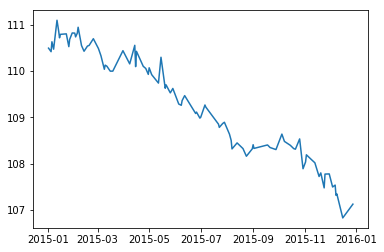

In [13]:
plt.plot(daily_df['trd_exctn_dt'], daily_df['rptd_pr']);

In [14]:
df['trd_exctn_dttm'] = pd.to_datetime(pdutils.combine_date_time(df, 'trd_exctn_dt', 'trd_exctn_tm'))

In [15]:
df['trc_st'].value_counts()

M    1887
G    1300
I      18
N      11
O      11
H       7
Name: trc_st, dtype: int64

C:\Programs\Win64\Anaconda\V4.4.0_3.6\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


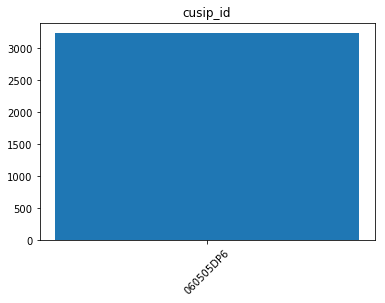

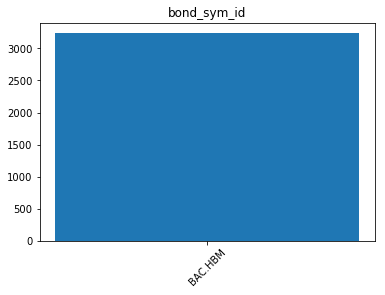

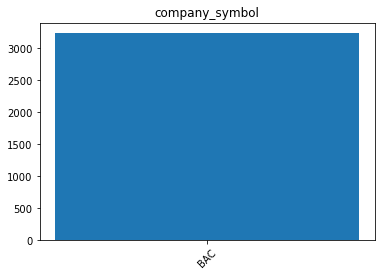

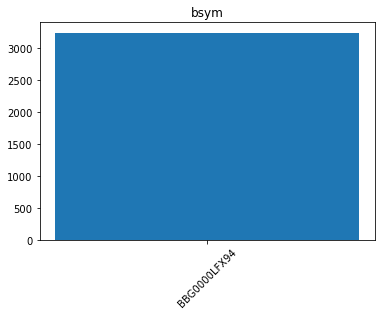

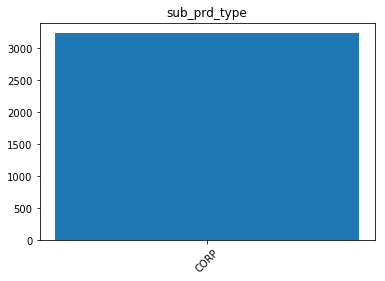

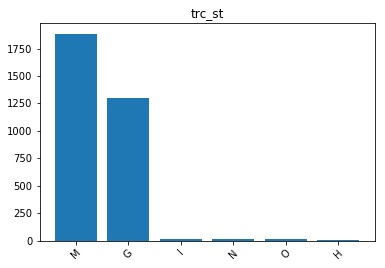

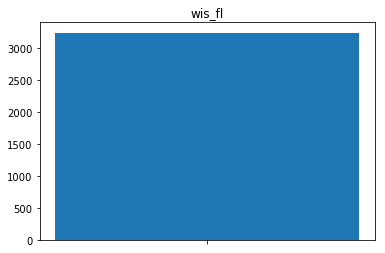

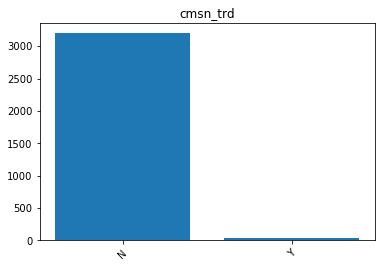

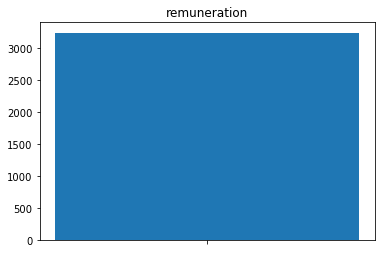

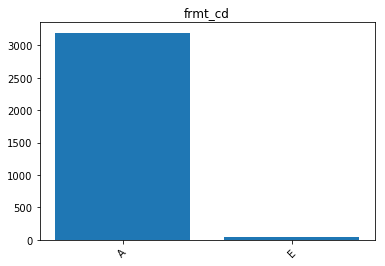

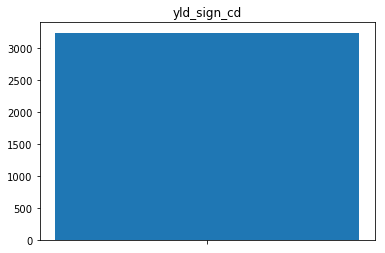

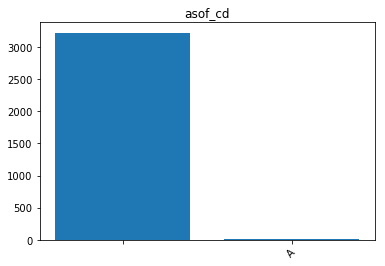

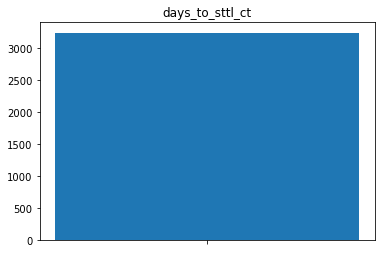

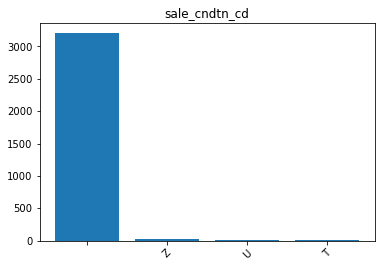

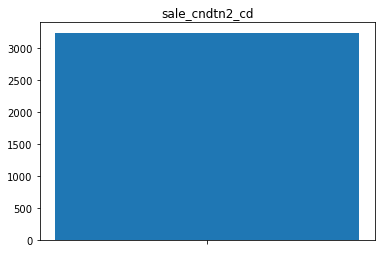

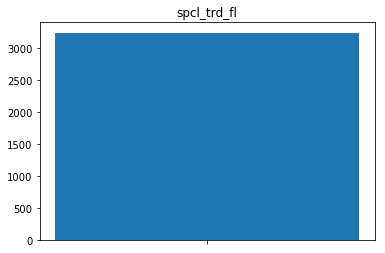

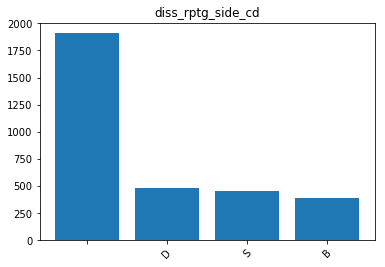

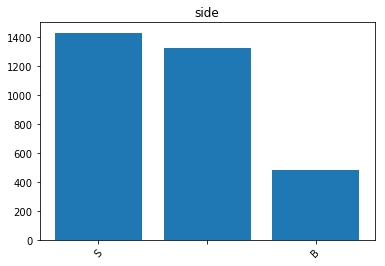

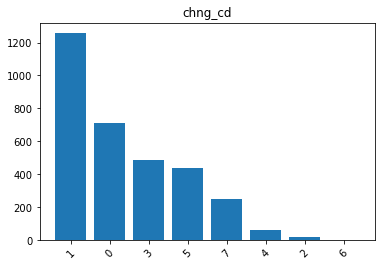

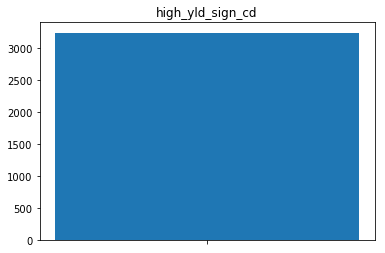

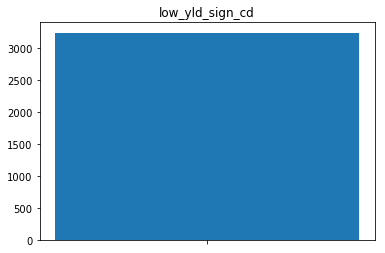

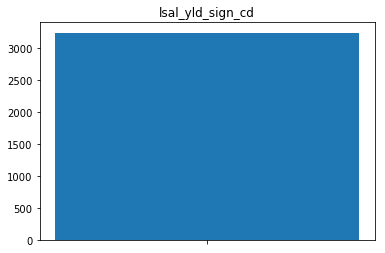

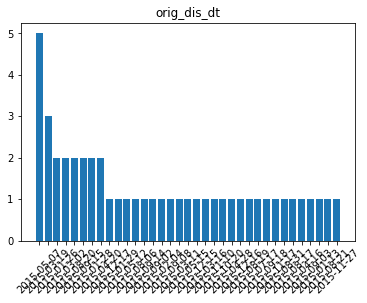

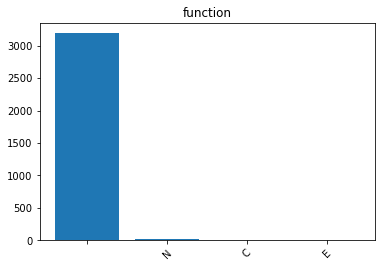

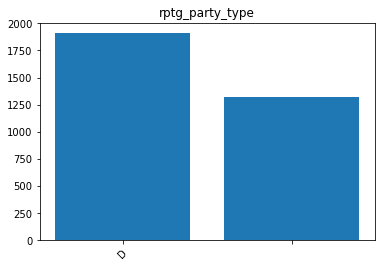

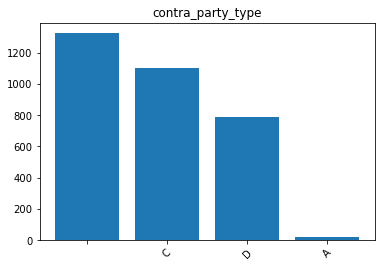

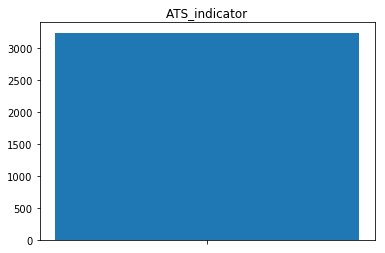

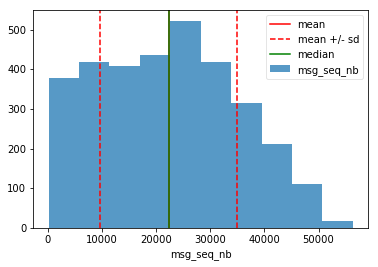

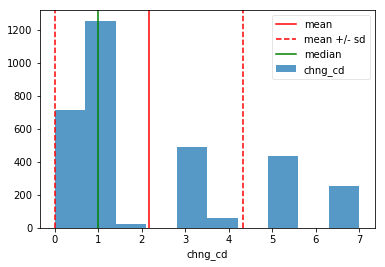

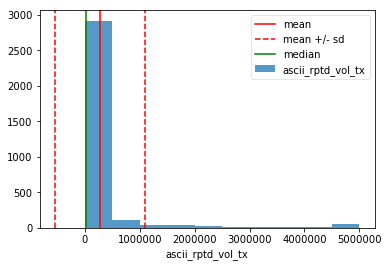

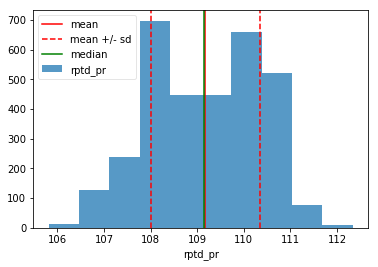

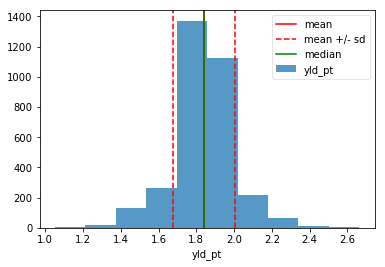

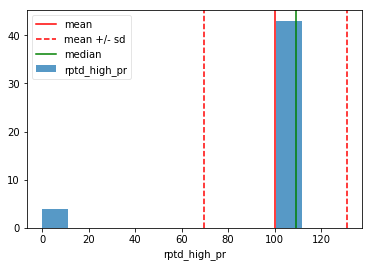

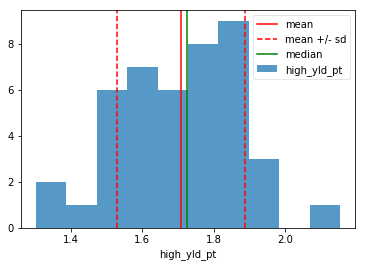

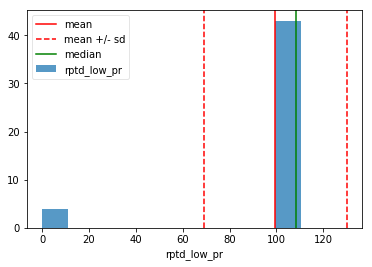

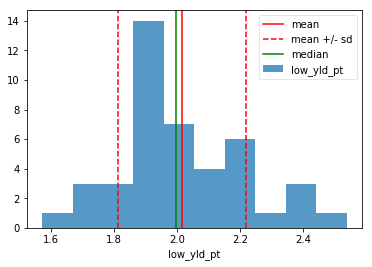

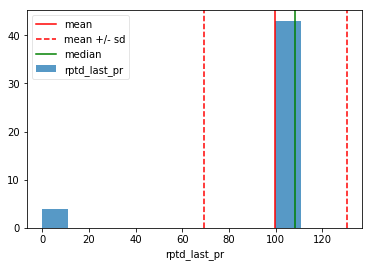

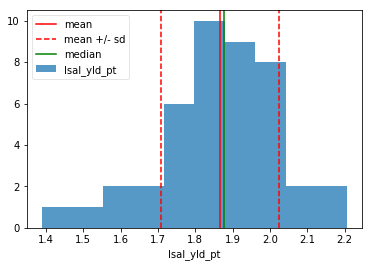

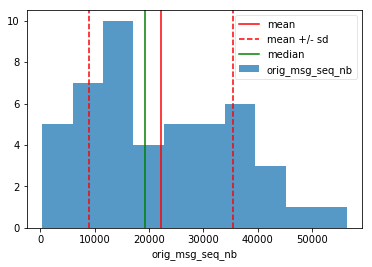

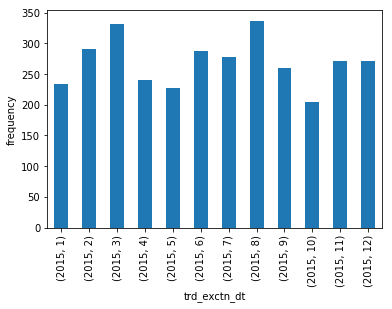

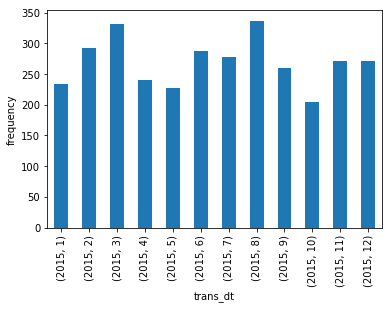

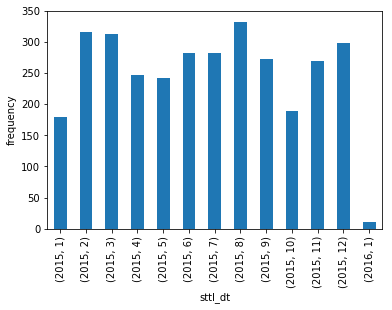

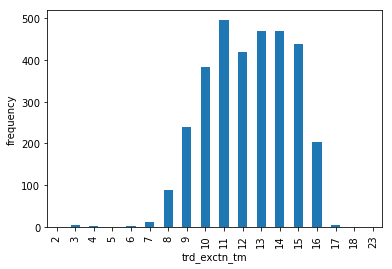

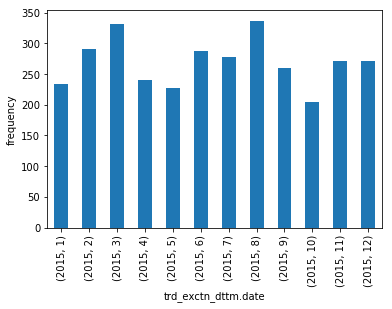

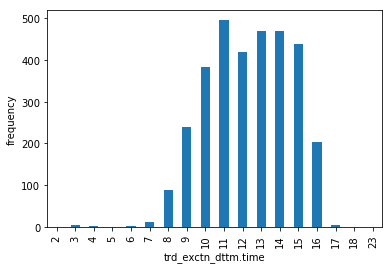

In [16]:
visual.visualise_df(df)

In [17]:
def visualise_trace_df(df):
    fig, ax = visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'C') & (df['side'] == 'B')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', scaling=finance.usd_trade_size_scaling, color='green')
    visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'C') & (df['side'] == 'S')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', fig=fig, ax=ax, scaling=finance.usd_trade_size_scaling, color='red')
    visual.visualise_df_sized_point_series(df[(df['contra_party_type'] == 'D') & (df['side'] == 'S')], 'trd_exctn_dttm', 'rptd_pr', 'ascii_rptd_vol_tx', fig=fig, ax=ax, scaling=finance.usd_trade_size_scaling, color='blue')

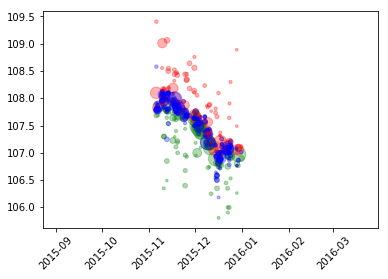

In [18]:
visualise_trace_df(df[-500:])